In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


In [18]:
missing_values = df.isna().sum()
print(missing_values)
df.info()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges     

In [19]:
unique_values = df.nunique()
print("Number of unique values for each column:")
print(unique_values)

Number of unique values for each column:
AccountAge                     119
MonthlyCharges              243787
TotalCharges                243787
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered                 4
ViewingHoursPerWeek         243787
AverageViewingDuration      243787
ContentDownloadsPerMonth        50
GenrePreference                  5
UserRating                  243787
SupportTicketsPerMonth          10
Gender                           2
WatchlistSize                   25
ParentalControl                  2
SubtitlesEnabled                 2
CustomerID                  243787
Churn                            2
dtype: int64


In [9]:
# Calculate the snapshot churn rate
churned_customers = df[df['Churn'] == 1].shape[0]
total_customers = df.shape[0]

snapshot_churn_rate = (churned_customers / total_customers) * 100

print(f"Snapshot Churn Rate: {snapshot_churn_rate:.2f}%")

Snapshot Churn Rate: 18.12%


In [10]:
churned_customers = df[df['Churn'] == 1].shape[0]
retained_customers = df[df['Churn'] == 0].shape[0]
print(churned_customers)
print(retained_customers)

44182
199605


In [11]:
# Calculate simplified Customer Lifetime Value (sCLV)
average_revenue_per_customer = df['TotalCharges'].sum() / df.shape[0]
average_lifetime = df['AccountAge'].sum() / df.shape[0] 

sCLV = average_revenue_per_customer * average_lifetime

print(f"Simplified CLV: ${sCLV:.2f}")

Simplified CLV: $45107.34


In [12]:
# Calculate average account age for churned customers
average_account_age_churned = df[df['Churn'] == 1]['AccountAge'].mean()

# Calculate average account age for retained customers
average_account_age_retained = df[df['Churn'] == 0]['AccountAge'].mean()

print(f"Average Account Age for Churned Customers: {average_account_age_churned:.2f} months")
print(f"Average Account Age for Retained Customers: {average_account_age_retained:.2f} months")

Average Account Age for Churned Customers: 45.67 months
Average Account Age for Retained Customers: 63.27 months


In [13]:
# Calculate average account age for churned customers
average_total_charges_churned = df[df['Churn'] == 1]['TotalCharges'].mean()

# Calculate average account age for retained customers
average_total_charges_retained = df[df['Churn'] == 0]['TotalCharges'].mean()

print("Average Total Charges for Churned Customers:", average_total_charges_churned)
print("Average Total Charges for Retained Customers:", average_total_charges_retained)

# Calculate average account age for churned customers
average_monthly_charges_churned = df[df['Churn'] == 1]['MonthlyCharges'].mean()

# Calculate average account age for retained customers
average_monthly_charges_retained = df[df['Churn'] == 0]['MonthlyCharges'].mean()

print("Average Monthly Charges for Churned Customers:", average_monthly_charges_churned)
print("Average Monthly Charges for Retained Customers:", average_monthly_charges_retained)

Average Total Charges for Churned Customers: 616.7378162099652
Average Total Charges for Retained Customers: 780.4022453177369
Average Monthly Charges for Churned Customers: 13.41488037963835
Average Monthly Charges for Retained Customers: 12.286128587225239


In [14]:
potential_months = average_account_age_retained - average_account_age_churned
average_revenue_lost = average_monthly_charges_retained * potential_months
total_revenue_lost = average_revenue_lost*churned_customers
print(churned_customers)
print(average_revenue_lost)
print(total_revenue_lost)

44182
216.22565415623646
9553281.85193084


In [15]:
average_total_charges = df['TotalCharges'].mean()

print(f"Average Total Charges for All Customers: ${average_total_charges:.2f}")

Average Total Charges for All Customers: $750.74


In [16]:
# Find the maximum total charges for churned customers
max_total_charges_churned = df[df['Churn'] == 1]['TotalCharges'].max()

# Find the maximum total charges for retained customers
max_total_charges_retained = df[df['Churn'] == 0]['TotalCharges'].max()

print(f"Max Total Charges for Churned Customers: ${max_total_charges_churned:.2f}")
print(f"Max Total Charges for Retained Customers: ${max_total_charges_retained:.2f}")

Max Total Charges for Churned Customers: $2356.61
Max Total Charges for Retained Customers: $2378.72


In [17]:
# Get column names
column_names = df.columns
print(column_names)

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')


In [18]:
df = df.drop('CustomerID', axis=1)
df = pd.get_dummies(df, columns=['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled'])

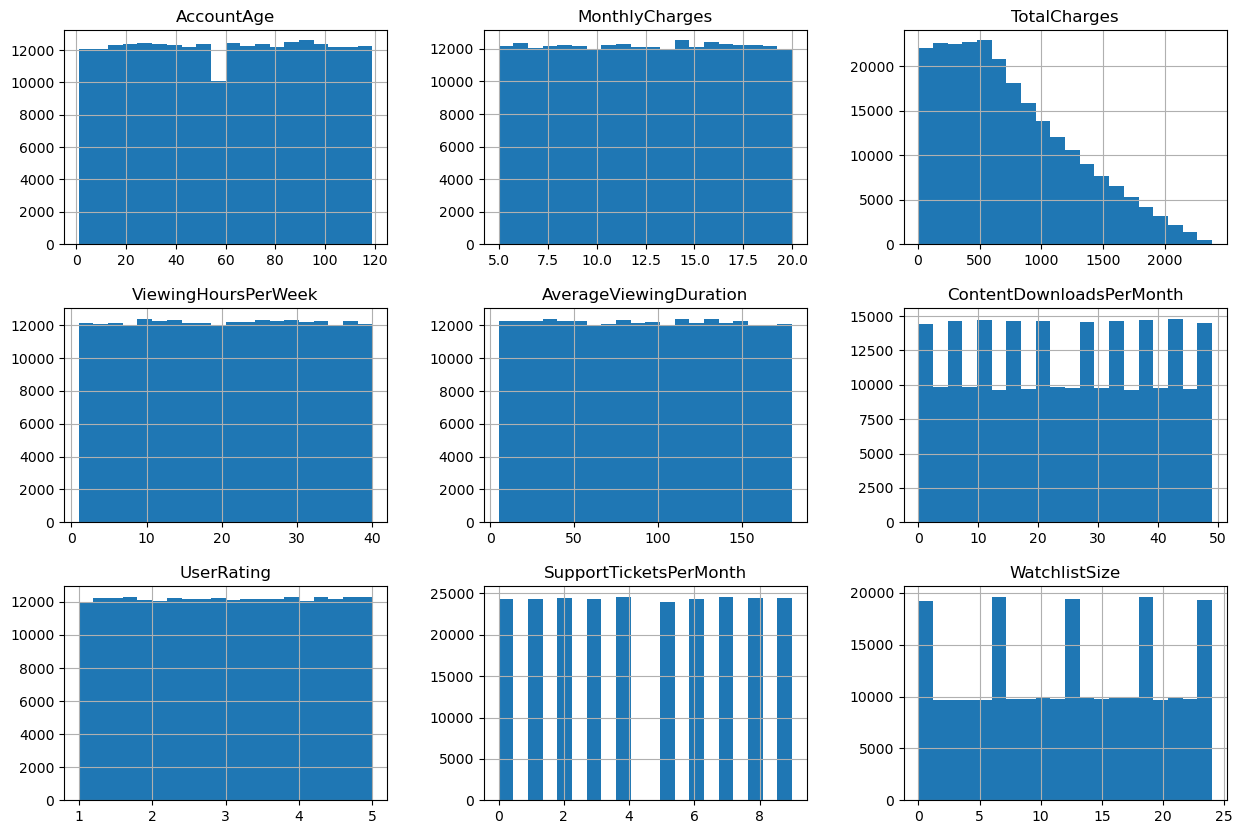

In [30]:
import matplotlib.pyplot as plt

#check distributions 
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
                       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
                       'SupportTicketsPerMonth', 'WatchlistSize']

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

In [31]:
df

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,0,0,0,1,0,1,1,0,1,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,0,0,0,0,0,1,1,0,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,0,0,1,0,0,1,0,1,0,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,0,1,0,0,0,1,0,1,0,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,13.502729,80.367312,47,3.697451,1,8,0,...,0,0,0,1,0,1,0,1,1,0
243783,117,13.049257,1526.763053,24.963291,59.818441,35,1.449742,4,20,0,...,1,0,0,0,0,1,1,0,1,0
243784,113,14.514569,1640.146267,10.628728,176.186095,44,4.012217,6,13,0,...,0,0,0,0,0,1,0,1,0,1
243785,7,18.140555,126.983887,30.466782,153.386315,36,2.135789,7,5,0,...,0,0,1,0,1,0,1,0,0,1


In [19]:
target = 'Churn'
features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize',
       'SubscriptionType_Basic', 'SubscriptionType_Premium',
       'SubscriptionType_Standard', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'ContentType_Both', 'ContentType_Movies',
       'ContentType_TV Shows', 'MultiDeviceAccess_No', 'MultiDeviceAccess_Yes',
       'DeviceRegistered_Computer', 'DeviceRegistered_Mobile',
       'DeviceRegistered_TV', 'DeviceRegistered_Tablet',
       'GenrePreference_Action', 'GenrePreference_Comedy',
       'GenrePreference_Drama', 'GenrePreference_Fantasy',
       'GenrePreference_Sci-Fi', 'Gender_Female', 'Gender_Male',
       'ParentalControl_No', 'ParentalControl_Yes', 'SubtitlesEnabled_No',
       'SubtitlesEnabled_Yes']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

In [33]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# performance metrics
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report_str)
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.8254030107879733

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     39968
           1       0.57      0.12      0.20      8790

    accuracy                           0.83     48758
   macro avg       0.70      0.55      0.55     48758
weighted avg       0.79      0.83      0.78     48758


Confusion Matrix:
[[39168   800]
 [ 7713  1077]]


Precision score: 0.5737879595098562
Recall score: 0.12252559726962457
Accuracy score: 0.8254030107879733
F1 score: 0.20193118965032342


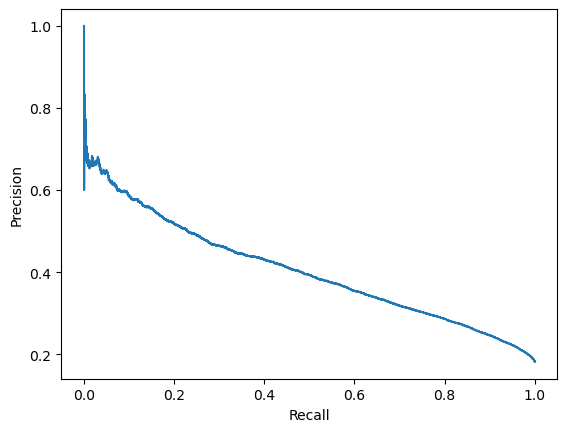

In [34]:
# Practice 1: Here we plot the Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# S1. Get probability: predicted probabilities (below 1)
pred_prob = logreg.predict_proba(X_test)[:,1] 
logreg.predict_proba(X_test).shape 
logreg.predict_proba(X_test)[ : ,1]

# S2. Collect Necessary Measures
precision_recall_curve(y_test, pred_prob)
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

y_pred_test = logreg.predict(X_test)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_pred_test))
print('Recall score:', recall_score(y_test, y_pred_test))
print('Accuracy score:', accuracy_score(y_test, y_pred_test))
print('F1 score:', f1_score(y_test, y_pred_test))

In [35]:
from sklearn.metrics import roc_auc_score
print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob))

AUC for logistic regression: 0.75366048242462


Text(0, 0.5, 'TRP')

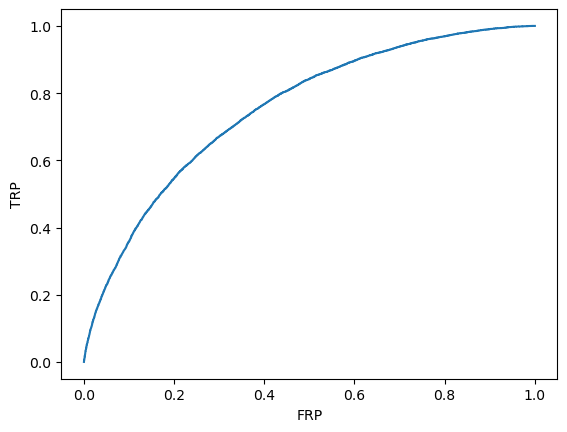

In [36]:
# Practice 2: Similar to Precision-Recall Curve

from sklearn.metrics import roc_curve
roc_curve(y_test, pred_prob)
FRP, TRP, threshold = roc_curve(y_test, pred_prob)
    
plt.plot(FRP, TRP)
plt.xlabel("FRP")
plt.ylabel("TRP")

In [37]:
# Create and train the Logistic Regression model with Ridge (L2) regularization
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the Ridge model
ridge_accuracy = accuracy_score(y_test, ridge_predictions)
print(f"Ridge Accuracy: {ridge_accuracy:.2f}")

# Display classification report for Ridge
print("Ridge Classification Report:")
print(classification_report(y_test, ridge_predictions))

Ridge Accuracy: 0.83
Ridge Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     39968
           1       0.57      0.12      0.20      8790

    accuracy                           0.83     48758
   macro avg       0.70      0.55      0.55     48758
weighted avg       0.79      0.83      0.78     48758



In [ ]:
# Practice 1: Here we plot the Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# S1. Get probability: predicted probabilities (below 1)
pred_prob = ridge_model.predict_proba(X_test)[:,1] 
ridge_model.predict_proba(X_test).shape 
ridge_model.predict_proba(X_test)[ : ,1]

# S2. Collect Necessary Measures
precision_recall_curve(y_test, pred_prob)
precision, recall, threshold = precision_recall_curve(y_test, pred_prob)

# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

y_pred_test = ridge_model.predict(X_test)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_pred_test))
print('Recall score:', recall_score(y_test, y_pred_test))
print('Accuracy score:', accuracy_score(y_test, y_pred_test))
print('F1 score:', f1_score(y_test, y_pred_test))

In [38]:
# Create and train the Logistic Regression model with Lasso (L1) regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the Lasso model
lasso_accuracy = accuracy_score(y_test, lasso_predictions)
print(f"Lasso Accuracy: {lasso_accuracy:.2f}")

# Display classification report for Lasso
print("Lasso Classification Report:")
print(classification_report(y_test, lasso_predictions))

Lasso Accuracy: 0.83
Lasso Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     39968
           1       0.57      0.12      0.20      8790

    accuracy                           0.83     48758
   macro avg       0.70      0.55      0.55     48758
weighted avg       0.79      0.83      0.78     48758



In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, predictions))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     39968
           1       0.26      0.30      0.28      8790

    accuracy                           0.72     48758
   macro avg       0.55      0.56      0.55     48758
weighted avg       0.74      0.72      0.73     48758



In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Display classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.82
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     39968
           1       0.58      0.07      0.13      8790

    accuracy                           0.82     48758
   macro avg       0.70      0.53      0.52     48758
weighted avg       0.78      0.82      0.76     48758



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create and train a base Random Forest model
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

# Create and train a BaggingClassifier using the base Random Forest model
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the Bagging model
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagging with Random Forest Accuracy: {bagging_accuracy:.2f}")

# Display classification report for Bagging
print("Bagging with Random Forest Classification Report:")
print(classification_report(y_test, bagging_predictions))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier() #default euclidean distance 

#if manhattan distance
#knn = KNeighborsClassifier(p=1) 

# define a list of parameters: ODD numbers 3-25 inclusive 
param_knn = {'n_neighbors': range(3,26,2)}  # exactly the same as the input variable name. #26 instead of 25 because includes j
#range (i,j,s): integers from i to j, exclude j, increase by s

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# the best hyperparameter chosen:
print(grid_knn.best_params_)

# When k=25 (best case), the validation score of through CV is:
print(grid_knn.best_score_)
#know grid search specific outputs - best model, best estimator, best params 

In [ ]:
#tune model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
base_svc = SVC(random_state = 0, kernel = 'rbf') #have to specify kernal if it is a polynomial kernal

#define a list of parameters
param_svc_kernel = {'C':    [0.001, 0.01, 0.1, 1, 10, 100, 10000] ,
                    'gamma':   [0.0001, 0.001,0.001,0.1,1,10]   } # C = 10,000 mimics hard-margin SVM

#large c mimics hard margin 

#apply grid search
grid_ksvc = GridSearchCV(base_svc, param_svc_kernel, cv = 5, n_jobs=2)
grid_ksvc.fit(X_train, y_train)
grid_ksvc.score(X_test, y_test)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
cat_nb = CategoricalNB(alpha = 0) #alpha = 0 because not smoothing 
cat_nb.fit(X,Y) #throwing all Xs and Ys because in class practice is used using all the Xs and Ys (not splitting)
cat_nb.score(X,Y)

In [ ]:
#boosting with adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame and features and target are defined
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a base Decision Tree model
base_model = DecisionTreeClassifier(max_depth=3, random_state=42)
base_model.fit(X_train, y_train)

# Create and train an AdaBoostClassifier using the base Decision Tree model
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.2f}")

# Display classification report for AdaBoost
print("AdaBoost Classification Report:")
print(classification_report(y_test, adaboost_predictions))